# Customer Segmentation & Product Recommendation System## Data Science Internship Task 2 - Flipkart Pvt Ltd

In [53]:
import os
os.environ["OMP_NUM_THREADS"] = "1"
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

print("***************************CUSTOMER SEGMENTATION & PRODUCT RECOMMENDATION SYSTEM************************************")
# Load dataset
df = pd.read_csv((r"C:\Users\manasa\Downloads\expanded_sample_transactions.csv"))
print(df.head())
# Check size and basic info
print("Transactions shape:", df.shape)
print("Unique Customers:", df['CustomerID'].nunique())
print("\nPreview:\n", df.head())


#Basic info about the dataset
print(" ")
print(df.info())

# Summary statistics for numeric columns 
print(df.describe())

# Check unique values in categorical columns
print(df['ProductID'].unique())
print(df['CustomerID'].nunique())


***************************CUSTOMER SEGMENTATION & PRODUCT RECOMMENDATION SYSTEM************************************
  CustomerID ProductID     Category  PurchaseAmount PurchaseDate
0       C001      P001  Electronics           15000   2024-01-15
1       C002      P002      Fashion            2500   2024-01-16
2       C003      P003    Groceries             500   2024-01-17
3       C001      P002      Fashion            3000   2024-02-10
4       C004      P004  Electronics           20000   2024-02-12
Transactions shape: (16, 5)
Unique Customers: 10

Preview:
   CustomerID ProductID     Category  PurchaseAmount PurchaseDate
0       C001      P001  Electronics           15000   2024-01-15
1       C002      P002      Fashion            2500   2024-01-16
2       C003      P003    Groceries             500   2024-01-17
3       C001      P002      Fashion            3000   2024-02-10
4       C004      P004  Electronics           20000   2024-02-12
 
<class 'pandas.core.frame.DataFrame'>
Ran

CustomerID        0
ProductID         0
Category          0
PurchaseAmount    0
PurchaseDate      0
dtype: int64
CustomerID        object
ProductID         object
Category          object
PurchaseAmount     int64
PurchaseDate      object
dtype: object
0


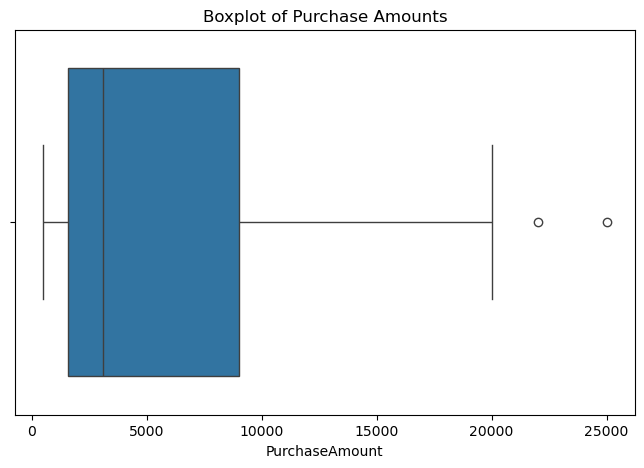

✅ Cleaned dataset saved as 'cleaned_sales_data.csv'


In [54]:
#Data Cleaning

# Check for missing values
print(df.isnull().sum())
#check for data types
print(df.dtypes)
#check for duplicate values
print(df.duplicated().sum())
#checking the outlier
plt.figure(figsize=(8,5))
sns.boxplot(x=df['PurchaseAmount'])
plt.title("Boxplot of Purchase Amounts")
plt.savefig("Checking the outlier.png")
plt.show()
# cleaned data
df.to_csv("cleaned_sales_data.csv", index=False)
print("✅ Cleaned dataset saved as 'cleaned_sales_data.csv'")


In [55]:
# Feature Engineering
customer_features = df.groupby('CustomerID').agg(
    TotalSpend=('PurchaseAmount', 'sum'),
    AvgSpend=('PurchaseAmount', 'mean'),
    PurchaseFrequency=('PurchaseAmount', 'count'),
    PreferredCategory=('Category', lambda x: x.mode()[0]),
    FirstPurchaseDate=('PurchaseDate', 'min'),
    LastPurchaseDate=('PurchaseDate', 'max')
).reset_index()

print(customer_features.head())

customer_numeric_features = df.groupby('CustomerID').agg({
    'PurchaseAmount': ['sum', 'mean', 'count']
}).reset_index()
customer_numeric_features.columns = ['CustomerID', 'TotalSpend', 'AvgSpend', 'PurchaseFrequency']

# Mergeing with previous customer_features to keep all info
customer_features = customer_features.drop(['TotalSpend','AvgSpend','PurchaseFrequency'], axis=1)
customer_features = customer_features.merge(customer_numeric_features, on='CustomerID')
print(customer_features.head())

  CustomerID  TotalSpend  AvgSpend  PurchaseFrequency PreferredCategory  \
0       C001       18000    9000.0                  2       Electronics   
1       C002        3700    1850.0                  2           Fashion   
2       C003         500     500.0                  1         Groceries   
3       C004       23200   11600.0                  2       Electronics   
4       C005        1500    1500.0                  1         Groceries   

  FirstPurchaseDate LastPurchaseDate  
0        2024-01-15       2024-02-10  
1        2024-01-16       2024-03-09  
2        2024-01-17       2024-01-17  
3        2024-02-12       2024-03-10  
4        2024-02-13       2024-02-13  
  CustomerID PreferredCategory FirstPurchaseDate LastPurchaseDate  TotalSpend  \
0       C001       Electronics        2024-01-15       2024-02-10       18000   
1       C002           Fashion        2024-01-16       2024-03-09        3700   
2       C003         Groceries        2024-01-17       2024-01-17       

(16, 5)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   CustomerID      16 non-null     object
 1   ProductID       16 non-null     object
 2   Category        16 non-null     object
 3   PurchaseAmount  16 non-null     int64 
 4   PurchaseDate    16 non-null     object
dtypes: int64(1), object(4)
memory usage: 772.0+ bytes
None
       PurchaseAmount
count       16.000000
mean      7075.000000
std       8369.189527
min        500.000000
25%       1575.000000
50%       3100.000000
75%       9000.000000
max      25000.000000


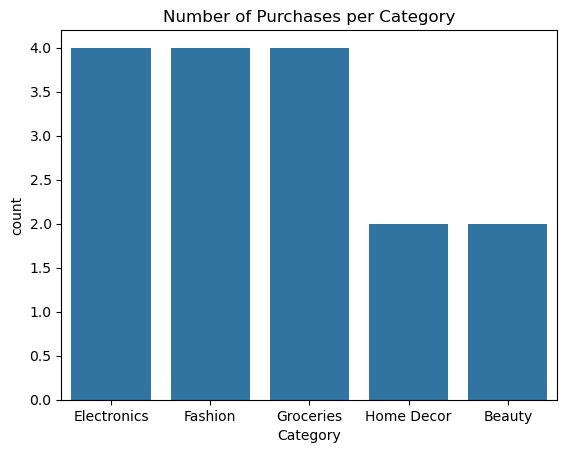

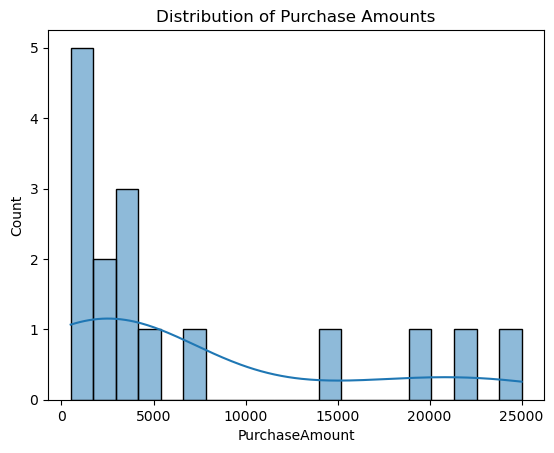

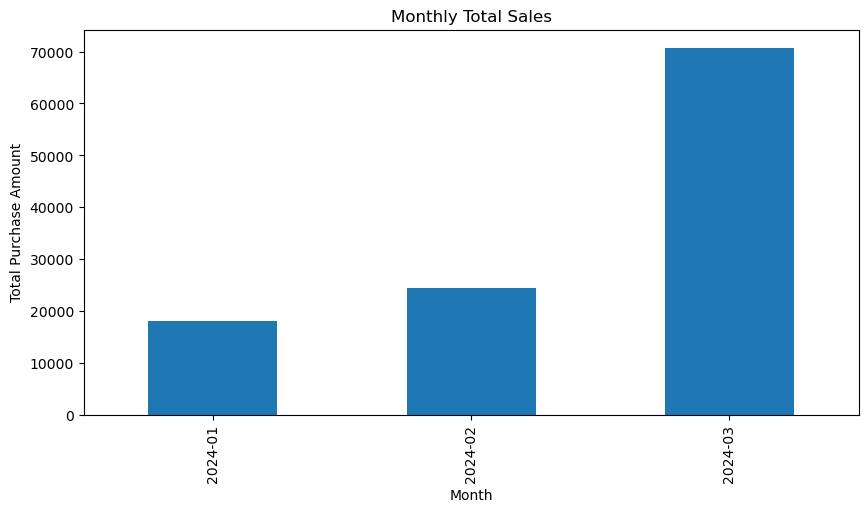

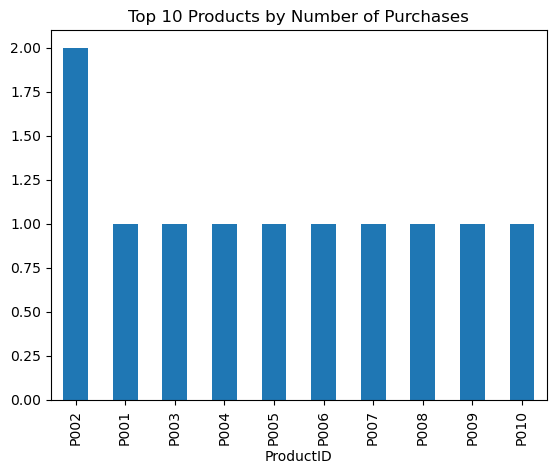

In [46]:
#EDA
print(df.shape)
print(df.info())
print(df.describe())

#Transaction-Level EDA
df['PurchaseDate']=pd.to_datetime(df['PurchaseDate'])

# 1. Number of purchases per category
sns.countplot(x='Category', data=df)
plt.title("Number of Purchases per Category")
plt.savefig("Number of Purchases Per Category.png")
plt.show()
# 2. Distribution of PurchaseAmount
sns.histplot(df['PurchaseAmount'], bins=20, kde=True)
plt.title("Distribution of Purchase Amounts")
plt.savefig("Distribution of Purchase Amounts.png")
plt.show()
# 3. Sales trend over time (monthly total sales)
monthly_sales = df.groupby(df['PurchaseDate'].dt.to_period('M'))['PurchaseAmount'].sum()
monthly_sales.plot(kind='bar', figsize=(10,5))
plt.title("Monthly Total Sales")
plt.xlabel("Month")
plt.ylabel("Total Purchase Amount")
plt.savefig("Monthly Total Sales.png")
plt.show()
# 4. Top products by number of purchases
top_products = df['ProductID'].value_counts().head(10)
top_products.plot(kind='bar')
plt.title("Top 10 Products by Number of Purchases")
plt.savefig("Top products by number of Purchases.png")
plt.show()

         TotalSpend      AvgSpend  PurchaseFrequency
count     10.000000     10.000000          10.000000
mean   11320.000000   7100.000000           1.600000
std     9930.961686   7536.688044           0.516398
min      500.000000    500.000000           1.000000
25%     2275.000000   1812.500000           1.000000
50%     8300.000000   4150.000000           2.000000
75%    21675.000000  10837.500000           2.000000
max    25000.000000  25000.000000           2.000000


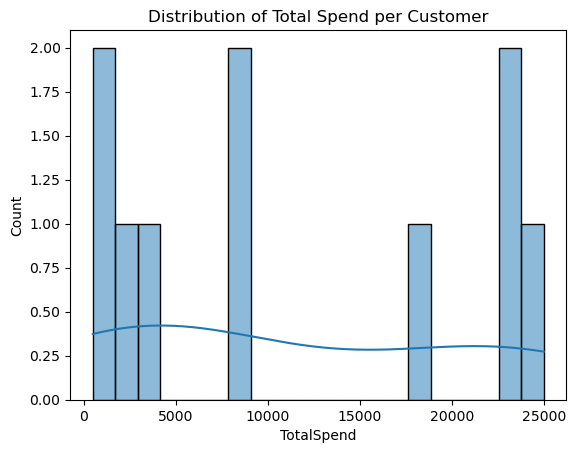

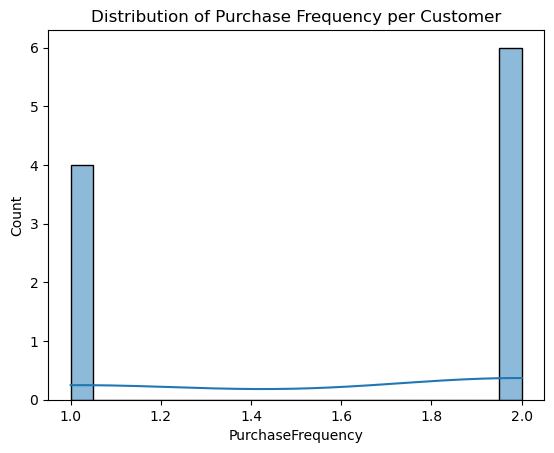

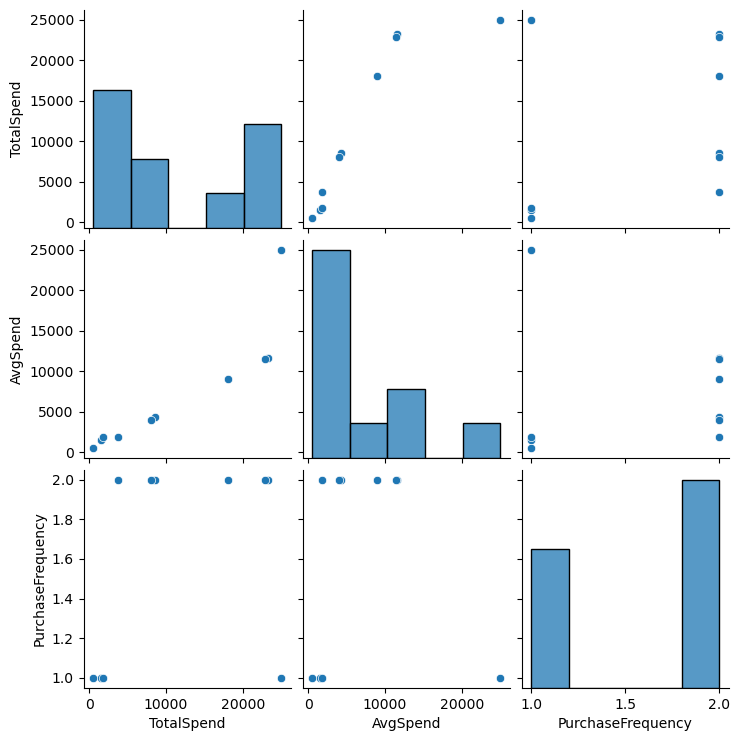

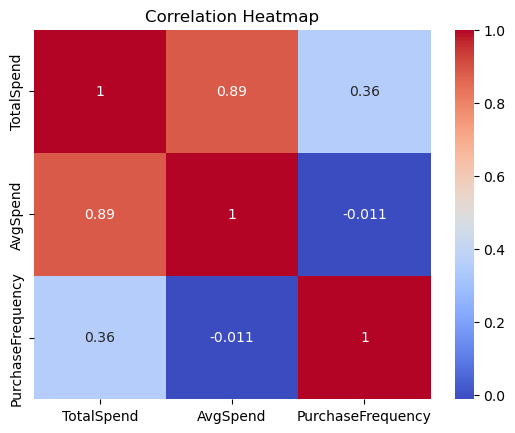

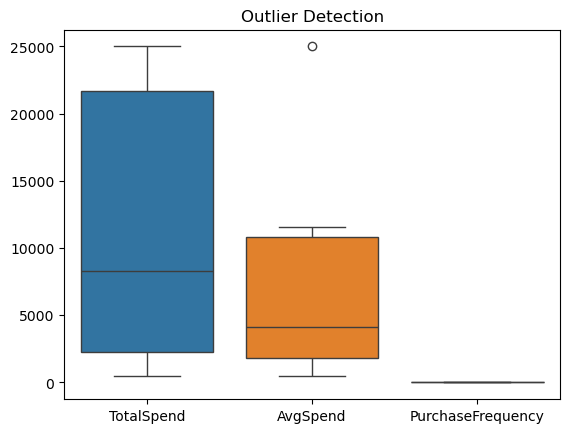

In [47]:
#Customer-Level EDA

# 1. Summary statistics
print(customer_features.describe())

# 2. Distribution of key metrics
sns.histplot(customer_features['TotalSpend'], bins=20, kde=True)
plt.title("Distribution of Total Spend per Customer")
plt.savefig("TotalSpend_Distribution.png") 
plt.show()

sns.histplot(customer_features['PurchaseFrequency'], bins=20, kde=True)
plt.title("Distribution of Purchase Frequency per Customer")
plt.savefig("PurchaseFrequency_Distribution.png")
plt.show()

# 3. Pairplot to see relationships
sns.pairplot(customer_features[['TotalSpend', 'AvgSpend', 'PurchaseFrequency']])
plt.savefig("pairplot_Distribution.png")
plt.show()

# 4. Correlation heatmap
sns.heatmap(customer_features[['TotalSpend', 'AvgSpend', 'PurchaseFrequency']].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.savefig("Correlation_Distribution.png")
plt.show()

# 5. Boxplot to detect outliers
sns.boxplot(data=customer_features[['TotalSpend', 'AvgSpend', 'PurchaseFrequency']])
plt.title("Outlier Detection")
plt.savefig("Outlier_Detection.png")
plt.show()

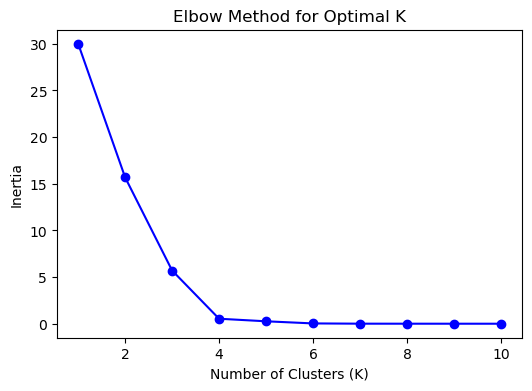

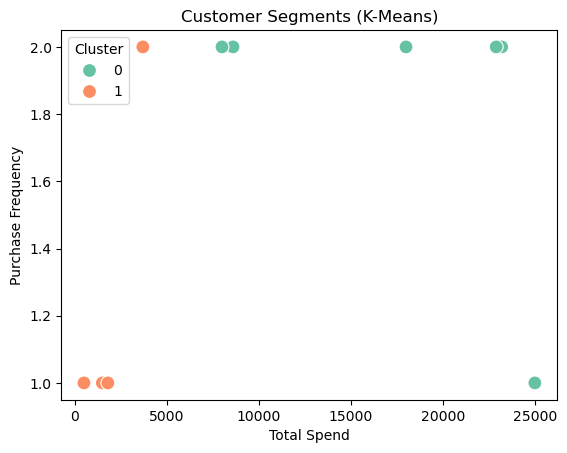

  CustomerID PreferredCategory FirstPurchaseDate LastPurchaseDate  TotalSpend  \
0       C001       Electronics        2024-01-15       2024-02-10       18000   
1       C002           Fashion        2024-01-16       2024-03-09        3700   
2       C003         Groceries        2024-01-17       2024-01-17         500   
3       C004       Electronics        2024-02-12       2024-03-10       23200   
4       C005         Groceries        2024-02-13       2024-02-13        1500   
5       C006            Beauty        2024-03-01       2024-03-11        8600   
6       C007           Fashion        2024-03-02       2024-03-12        8000   
7       C008       Electronics        2024-03-05       2024-03-13       22900   
8       C009       Electronics        2024-03-07       2024-03-07       25000   
9       C010            Beauty        2024-03-08       2024-03-08        1800   

   AvgSpend  PurchaseFrequency  Cluster  
0    9000.0                  2        0  
1    1850.0             

In [49]:
# ✅ CUSTOMER SEGMENTATION USING K-MEANS

# Step 1: Selecting numerical features for clustering
X = customer_features[['TotalSpend', 'AvgSpend', 'PurchaseFrequency']]

# Step 2: Scaleing the data 

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 3: Elbow Method to find optimal number of clusters
inertia = []
K_range = range(1, min(11, len(X_scaled)+1))  # k should be <= number of customers
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Ploting the elbow curve
plt.figure(figsize=(6,4))
plt.plot(K_range, inertia, 'bo-')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal K')
plt.savefig("Elbow Curve.png")
plt.show()

# Step 4: Fit K-Means with a reasonable number of clusters 
optimal_k = 2  # Example: choose 2 clusters
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
customer_features['Cluster'] = kmeans.fit_predict(X_scaled)

# Step 5: Visualize clusters
sns.scatterplot(
    x=customer_features['TotalSpend'], 
    y=customer_features['PurchaseFrequency'], 
    hue=customer_features['Cluster'],
    palette='Set2',
    s=100
)
plt.title('Customer Segments (K-Means)')
plt.xlabel('Total Spend')
plt.ylabel('Purchase Frequency')
plt.savefig("customer segmentation.png")
plt.show()


# Preview cluster assignments
print(customer_features)
customer_features.to_csv("customer_segments.csv", index=False)
print("✅ Customer segments saved as 'customer_segments.csv'")


   Cluster  Avg_Total_Spend  Total_Spend  Num_Customers     Avg_Spend  \
0        0     17616.666667       105700              6  10891.666667   
1        1      1875.000000         7500              4   1412.500000   

   Avg_Purchase_Freq  
0           1.833333  
1           1.250000  


C:\Users\manasa\AppData\Local\Temp\ipykernel_22000\4017398678.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Cluster', y='TotalSpend', data=customer_features, palette='Set2')


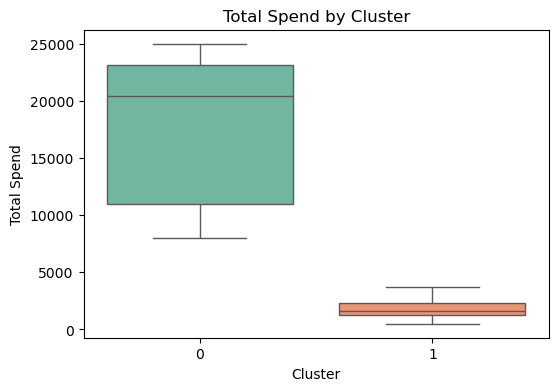

C:\Users\manasa\AppData\Local\Temp\ipykernel_22000\4017398678.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Cluster', y='AvgSpend', data=customer_features, palette='Set2')


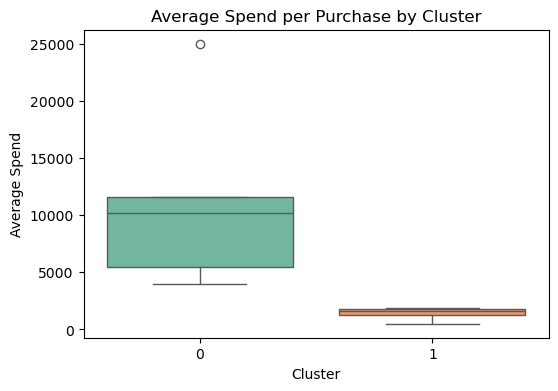

C:\Users\manasa\AppData\Local\Temp\ipykernel_22000\4017398678.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Cluster', y='PurchaseFrequency', data=customer_features, palette='Set2')


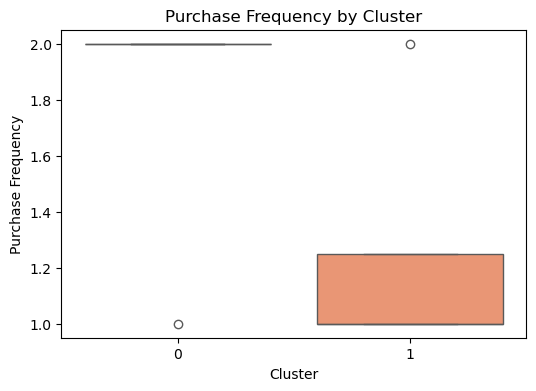

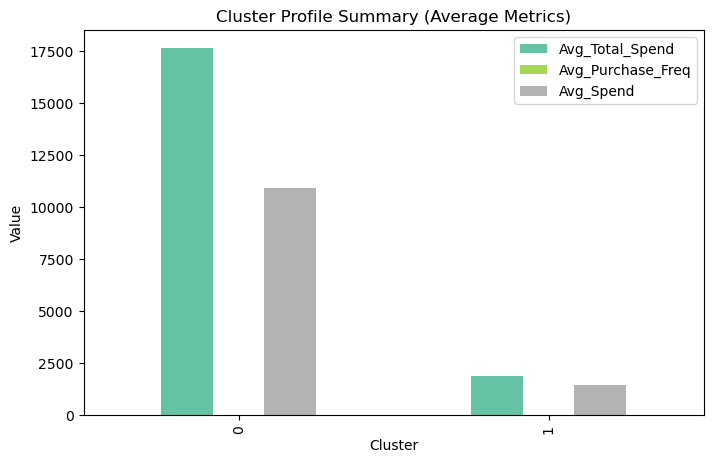

✅ Cluster profile summary saved as 'cluster_profile_summary.csv'


In [50]:
#Profile Analysis of Clusters

# Aggregate statistics per cluster
cluster_profile = customer_features.groupby('Cluster').agg({
    'TotalSpend': ['mean', 'sum', 'count'],
    'AvgSpend': 'mean',
    'PurchaseFrequency': 'mean'
}).reset_index()

# Flatten column names
cluster_profile.columns = ['Cluster', 'Avg_Total_Spend', 'Total_Spend', 'Num_Customers', 'Avg_Spend', 'Avg_Purchase_Freq']
print(cluster_profile)

# 4 Visualization - Boxplots to compare metrics across clusters
plt.figure(figsize=(6, 4))
sns.boxplot(x='Cluster', y='TotalSpend', data=customer_features, palette='Set2')
plt.title("Total Spend by Cluster")
plt.xlabel("Cluster")
plt.ylabel("Total Spend")
plt.savefig("TotalSpend_by_Cluster.png")
plt.show()

plt.figure(figsize=(6, 4))
sns.boxplot(x='Cluster', y='AvgSpend', data=customer_features, palette='Set2')
plt.title("Average Spend per Purchase by Cluster")
plt.xlabel("Cluster")
plt.ylabel("Average Spend")
plt.savefig("AvgSpend_by_Cluster.png")
plt.show()

plt.figure(figsize=(6, 4))
sns.boxplot(x='Cluster', y='PurchaseFrequency', data=customer_features, palette='Set2')
plt.title("Purchase Frequency by Cluster")
plt.xlabel("Cluster")
plt.ylabel("Purchase Frequency")
plt.savefig("PurchaseFrequency_by_Cluster.png")
plt.show()

# Bar chart for cluster summary (average values)
summary_plot = cluster_profile[['Cluster', 'Avg_Total_Spend', 'Avg_Purchase_Freq', 'Avg_Spend']]
summary_plot.set_index('Cluster').plot(kind='bar', figsize=(8,5), colormap='Set2')
plt.title("Cluster Profile Summary (Average Metrics)")
plt.xlabel("Cluster")
plt.ylabel("Value")
plt.legend(loc='best')
plt.savefig("Cluster_Profile_Summary.png")
plt.show()

cluster_profile.to_csv("cluster_profile_summary.csv", index=False)
print("✅ Cluster profile summary saved as 'cluster_profile_summary.csv'")



Recommended products for Customer C001 (Cluster 0):
   ProductID  PurchaseAmount  NumPurchases
6       P009           25000             1
10      P015           22000             1
2       P004           20000             1

Recommended products for Customer C002 (Cluster 1):
   ProductID  PurchaseAmount  NumPurchases
14      P010            1800             1
13      P005            1500             1
12      P003             500             1


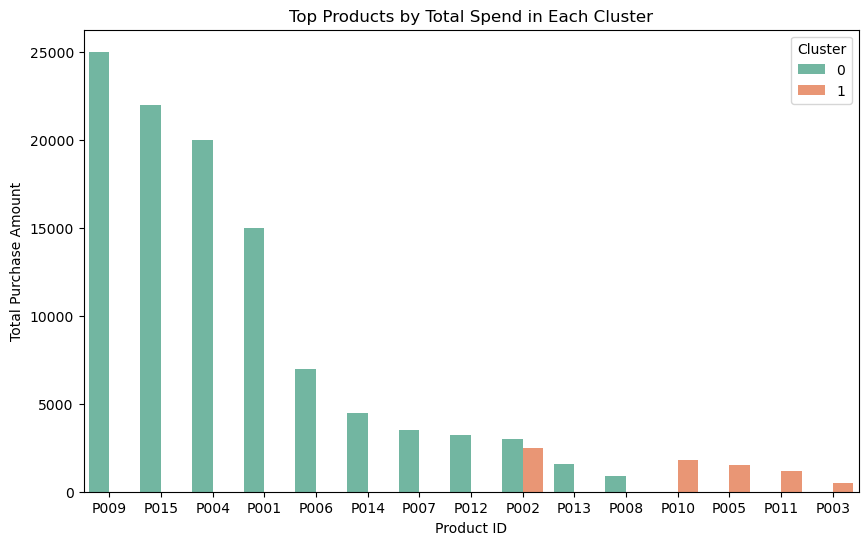

C:\Users\manasa\AppData\Local\Temp\ipykernel_22000\2167775591.py:53: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Cluster', y='PurchaseAmount', data=transactions_with_cluster, palette='coolwarm')


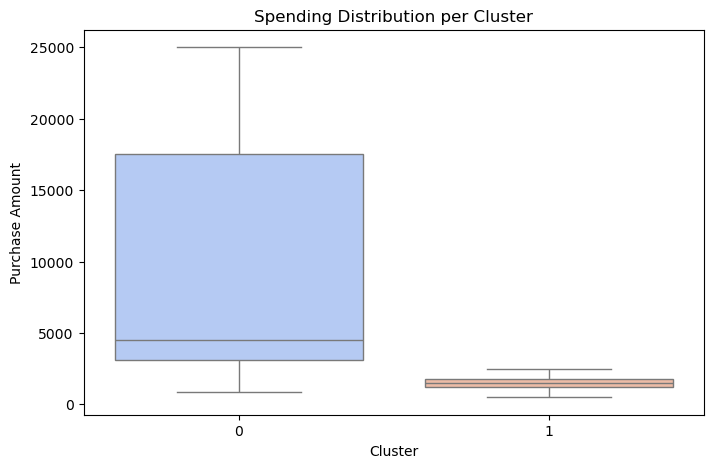

In [51]:
# ✅ CLUSTER-BASED PRODUCT RECOMMENDATION SYSTEM

# Step 1: Mergeing transactions with cluster labels
transactions_with_cluster = df.merge(
    customer_features[['CustomerID', 'Cluster']], 
    on='CustomerID'
)

# Step 2: Finding popular products in each cluster
cluster_product_popularity = transactions_with_cluster.groupby(['Cluster', 'ProductID']).agg({
    'PurchaseAmount': 'sum',  
    'CustomerID': 'count'     
}).rename(columns={'CustomerID': 'NumPurchases'}).reset_index()

# Sorting products by total spend within each cluster
cluster_product_popularity = cluster_product_popularity.sort_values(
    ['Cluster', 'PurchaseAmount'], ascending=[True, False]
)

# Step 3: Recommendation function
def recommend_products(customer_id, top_n=3):
    cluster = customer_features.loc[customer_features['CustomerID'] == customer_id, 'Cluster'].values[0]
    top_products = cluster_product_popularity[cluster_product_popularity['Cluster'] == cluster]
    top_products = top_products[~top_products['ProductID'].isin(
    df[df['CustomerID']==customer_id]['ProductID']
    )].head(top_n)
    print(f"\nRecommended products for Customer {customer_id} (Cluster {cluster}):")
    print(top_products[['ProductID', 'PurchaseAmount', 'NumPurchases']])
    return cluster, top_products

# Step 4: Test the recommender
cluster, top_products = recommend_products('C001', top_n=3)
cluster, top_products = recommend_products('C002', top_n=3)

# Step 5: Visualize Top Products per Cluster
plt.figure(figsize=(10,6))
sns.barplot(
    data=cluster_product_popularity, 
    x='ProductID', 
    y='PurchaseAmount', 
    hue='Cluster', 
    palette='Set2'
)
plt.title("Top Products by Total Spend in Each Cluster")
plt.xlabel("Product ID")
plt.ylabel("Total Purchase Amount")
plt.legend(title='Cluster')
plt.savefig("Top_Products_Per_Cluster.png")
plt.show()

# Cluster Spending Patterns
plt.figure(figsize=(8,5))
sns.boxplot(x='Cluster', y='PurchaseAmount', data=transactions_with_cluster, palette='coolwarm')
plt.title("Spending Distribution per Cluster")
plt.xlabel("Cluster")
plt.ylabel("Purchase Amount")
plt.savefig("Cluster_Spending_Distribution.png")
plt.show()
